DS320 Spring 2023: Final Project

Posted on Wed 05/03/ 23, Due on Mon 05/15/23 at 11:59 PM

We continue with the HCQ dataset in the midterm, and you are provided few more datasets: the Google Trend score of HCQ searching in 2020, tweets with sentiments, and geoMap.

You will use the clean HCQ dataset you have done for the midterm project. Do not upload the dataset to your Jupyter Luther since it is big. You need to download this notebook and work on it with Google Colab.

There are 10 tasks, each is worth 10 points. The bonus task is worth 20 points.

Note: I will mannually grade your code, so no test cases will be provided, but I can give you the expectation of the outcomes for tasks as I can.


# Import libraries

In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: 

We want to see the online users’ reaction patterns in the time
domain, including (a) Number of tweets, favorites on Twitter, (b) Google
keyword search score.

Create the following plot. You can take the events of the plot from the HCQ_event.csv file. Your figure should look similar (though not necessarily identical)

![Task 1](./images/task1.png)

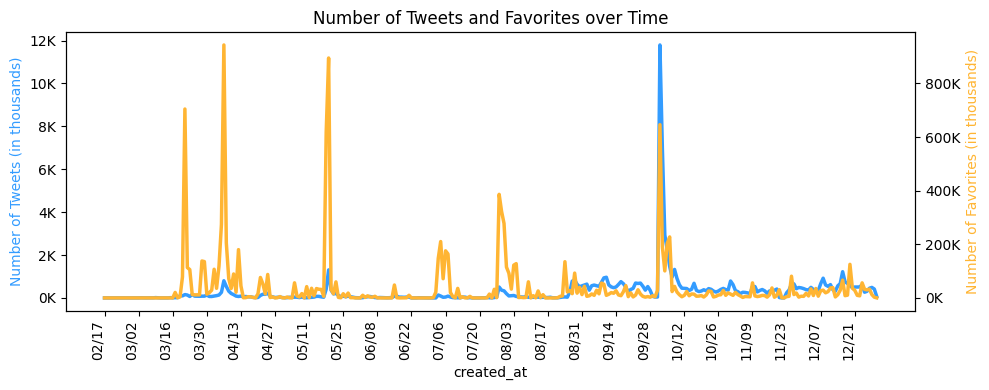

In [8]:
from matplotlib.ticker import FuncFormatter


# Load the data from the CSV file
data = pd.read_csv('clean_tweet_state.csv')

# Convert the 'created_at' column to datetime format
data['created_at'] = pd.to_datetime(data['created_at'])

# Filter the data for the desired date range
filtered_data = data[(data['created_at'] >= '2020-02-17') & (data['created_at'] <= '2021-01-04')]

# Set the 'created_at' column as the index
filtered_data.set_index('created_at', inplace=True)


# Resample the filtered data on a daily basis and calculate the count of tweets and the sum of favorites
daily_tweets = filtered_data['state'].resample('D').count()
daily_favorites = filtered_data['favorite_count'].resample('D').sum()

# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

# Plot the count of tweets on the left y-axis
sns.lineplot(data=daily_tweets, ax=ax1, color='#339CFF', linewidth=2.5)
ax1.set_ylabel('Number of Tweets (in thousands)', color='#339CFF')

# Plot the sum of favorites on the right y-axis
sns.lineplot(data=daily_favorites, ax=ax2, color='#FFB533', linewidth=2.5)
ax2.set_ylabel('Number of Favorites (in thousands)', color='#FFB533')

# Format the y-axis labels in thousands
formatter = FuncFormatter(lambda x, _: '{:.0f}K'.format(x / 1000))
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

# Set the x-axis tick locations and labels
xticks = pd.date_range(start=daily_tweets.index.min(), end=daily_tweets.index.max(), freq='2W-MON')  # Adjust the frequency as needed
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks.strftime('%m/%d'), rotation=90, ha='right')

# Set the labels, title, and legend
plt.xlabel('Date')
plt.title('Number of Tweets and Favorites over Time')

# Show the plot
plt.tight_layout()
plt.show()










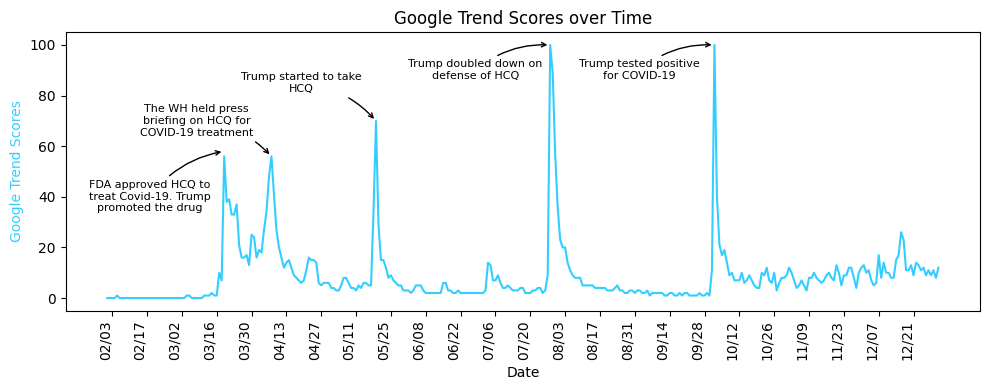

In [9]:
##Plot 2
from datetime import datetime
from datetime import timedelta
import textwrap



# Load the data from the CSV file
gg_data = pd.read_csv('gg_trend_2020.csv')

# Convert the 'Day' column to datetime format
gg_data['Day'] = pd.to_datetime(gg_data['Day'])

# Set the 'Day' column as the index
gg_data.set_index('Day', inplace=True)

# Resample the data to fill missing values and create a smooth curve
gg_data_resampled = gg_data.resample('D').interpolate()

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the Google Trend scores with a smooth curve
sns.lineplot(data=gg_data_resampled, x=gg_data_resampled.index, y='score', ax=ax, color='#33CEFF')

# Set the x-axis tick locations and labels
xticks = pd.date_range(start=gg_data.index.min(), end=gg_data.index.max(), freq='2W-MON')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime('%m/%d'), rotation=90, ha='right')

# Set the labels, title, and y-axis label
plt.xlabel('Date')
plt.ylabel('Google Trend Scores', color='#33CEFF')
plt.title('Google Trend Scores over Time', color='black')

# List of dictionaries representing each annotation
annotations = [
    {
        'text': 'FDA approved HCQ to treat Covid-19. Trump promoted the drug',
        'date': datetime(2020, 3, 19),
        'y_position': 40
    },
    {
        'text': 'The WH held press briefing on HCQ for COVID-19 treatment',
        'date': datetime(2020, 4, 7),
        'y_position': 70
    },
    {
        'text': 'Trump started to take HCQ',
        'date': datetime(2020, 5, 19),
        'y_position': 85
    },
    {
        'text': 'Trump doubled down on defense of HCQ',
        'date': datetime(2020, 7, 28),
        'y_position': 90
    },
    {
        'text': 'Trump tested positive for COVID-19',
        'date': datetime(2020, 10, 2),
        'y_position': 90
    }
]

event_trendscore = [58, 56, 70, 100, 100]

# Iterate through the annotations and event trend scores simultaneously
for annotation, score in zip(annotations, event_trendscore):
    text = annotation['text']
    date = annotation['date']
    y_position = annotation['y_position']

    # Wrap the text into multiple lines with a specified width
    wrapped_text = textwrap.fill(text, width=22)

    plt.annotate(wrapped_text,
                 xy=(date, score),
                 xytext=(date - timedelta(days=30), y_position),
                 ha='center',
                 arrowprops=dict(facecolor='black',
                                 arrowstyle='->',
                                 connectionstyle='arc3,rad=-0.2'),
                 verticalalignment='center',
                 horizontalalignment='center',
                 multialignment='center',
                 fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


## Task 2: 

We want to look closer at the number of tweets and favorites sent out on the five above days (the days you made annotations on) 

Create the following plot. Your figure should look similar (though not necessarily identical)

In this plot, 

<b>
the teal bars = #tweets on an event day / mean of #tweets on a 
day

the salmon bars = #favorites on an event day / mean of #favorites on a 
day
</b>
![Task 2](./images/task2.png)

/tmp/ipykernel_3443437/70385899.py:69: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 50])


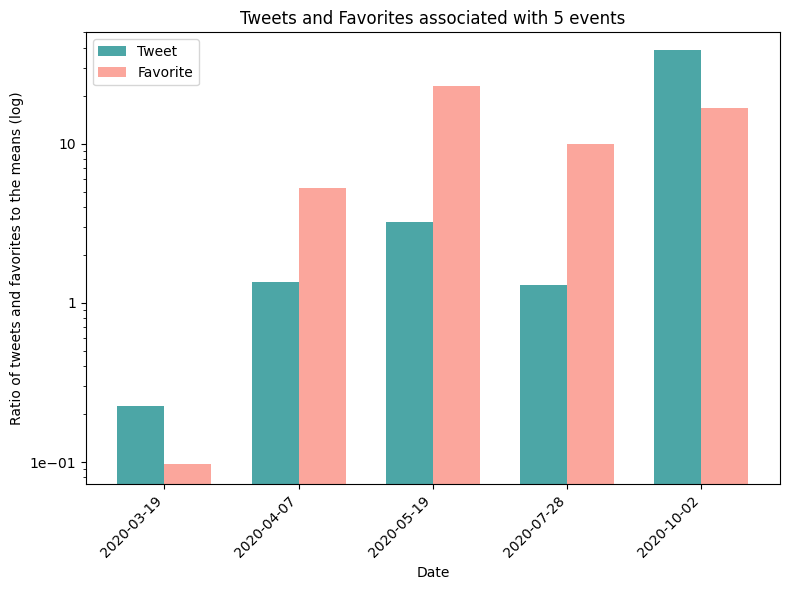

In [10]:
import numpy as np
import matplotlib.ticker as ticker


# Define the event days
event_days = ['2020-03-19', '2020-04-07', '2020-05-19', '2020-07-28', '2020-10-02']

# Create empty lists to store the ratios
tweet_ratios = []
favorite_ratios = []

# Calculate the mean ratios for each event day
for event_day in event_days:
    # Filter the data for the current event day
    event_data = data[data['created_at'].dt.date == pd.to_datetime(event_day).date()]

    # Calculate the number of tweets and favorites for the current event day
    num_tweets = len(event_data)
    
    num_favorites = event_data['favorite_count'].sum()
   
    # Calculate the mean of tweets per day
    mean_tweets_per_day = data.groupby(data['created_at'].dt.date)['full_text'].count().mean()
    
    # Calculate the mean of favorites per day
    mean_favorites_per_day = data.groupby(data['created_at'].dt.date)['favorite_count'].sum().mean()
   
    # Calculate the ratios of tweets and favorites to the mean for the current event day
    tweet_ratio = num_tweets / mean_tweets_per_day
    favorite_ratio = num_favorites / mean_favorites_per_day

    # Append the ratios to the lists
    tweet_ratios.append(tweet_ratio)
    favorite_ratios.append(favorite_ratio)

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set the title
ax.set_title('Tweets and Favorites associated with 5 events')

# Set the x-axis tick locations and labels
xticks = np.arange(len(event_days))
xticklabels = event_days
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

# Width of each bar
bar_width = 0.35

# Plot the teal bars (tweet ratios)
ax.bar(xticks - bar_width/2, tweet_ratios, width=bar_width, color='teal', alpha=0.7, label='Tweet')

# Plot the salmon bars (favorite ratios)
ax.bar(xticks + bar_width/2, favorite_ratios, width=bar_width, color='salmon', alpha=0.7, label='Favorite')

# Set the axis label
ax.set_ylabel('Ratio of tweets and favorites to the means (log)')
ax.set_xlabel('Date')

# Set the y-axis scale to log
ax.set_yscale('log')

# Create logarithmic tick locators and formatters for the y-axis
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=5))
ax.yaxis.set_major_formatter(ticker.LogFormatter(base=10.0))

# Set the y-axis limits
ax.set_ylim([0, 50])

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()




## Task 3: 

We want to see the distributions of reply_count and retweet_count for a tweet.

Create the following plot. Your figure should look similar (though not necessarily identical)

<i><b>What insights do you recognize from the plot?</b></i>

![Task 3](./images/task3.png)

In [ ]:


# Load the data containing HCQ-related tweets
data = pd.read_csv('clean_tweet_state.csv')

# Calculate the frequencies of reply_count and retweet_count separately
reply_freq = data['reply_count'].value_counts().sort_index()
retweet_freq = data['retweet_count'].value_counts().sort_index()

# Get the unique values of both reply_count and retweet_count
counts = sorted(set(reply_freq.index) | set(retweet_freq.index))

# Reindex the frequency series with the unique values and fill missing counts with frequency 0
reply_freq = reply_freq.reindex(counts, fill_value=0)
retweet_freq = retweet_freq.reindex(counts, fill_value=0)

# Set the x-axis tick locations and labels
x = range(len(counts))

# Plot the bars for reply_count
plt.bar(x, reply_freq, width=0.4, color='blue', alpha=0.7, label='Reply Count')

# Plot the bars for retweet_count
plt.bar(x, retweet_freq, width=0.4, color='orange', alpha=0.7, label='Retweet Count', align='edge')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the x-axis tick locations and labels
plt.xticks(x, labels=counts)

# Set the plot title and legend
plt.title('Frequency Distribution of Reply Count and Retweet Count')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Task 4: 

We want to look see if there is any patterns of posted tweets and favorites over days of weeks.

Create the following plot. Your figure should look similar (though not necessarily identical)

<i><b>What insights do you recognize from the plot?</b></i>

![Task 4](./images/task4.png)

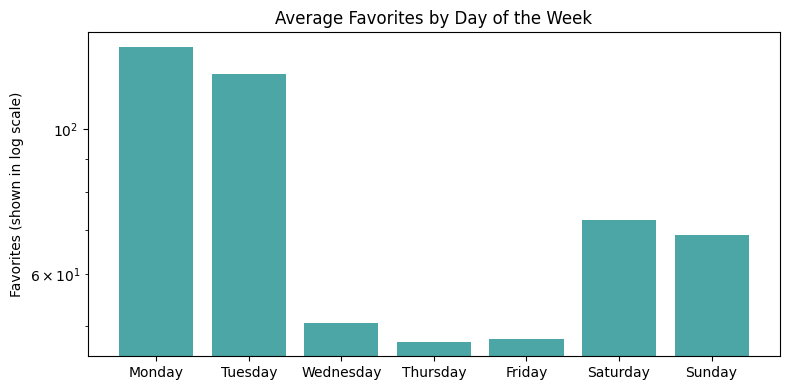

In [12]:




# Extract the day of the week from the 'created_at' column
data['day_of_week'] = data['created_at'].dt.day_name()

# Define the order of the days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the average favorites for each day of the week
favorites_by_day = data.groupby('day_of_week')['favorite_count'].mean().reindex(order)

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(favorites_by_day.index, favorites_by_day, color='teal', alpha=0.7)

# Set the y-axis scale to log
ax.set_yscale('log')

# Set the y-axis label
ax.set_ylabel('Favorites (shown in log scale)')

# Set the title
ax.set_title('Average Favorites by Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


## Task 5: 

We want to look see if there is any relationships between the number of tweets and the number of favorites sending out on a day.

Create the following plot. Your figure should look similar (though not necessarily identical)

<i><b>What insights do you recognize from the plot?</b></i>

![Task 5](./images/task5.png)

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


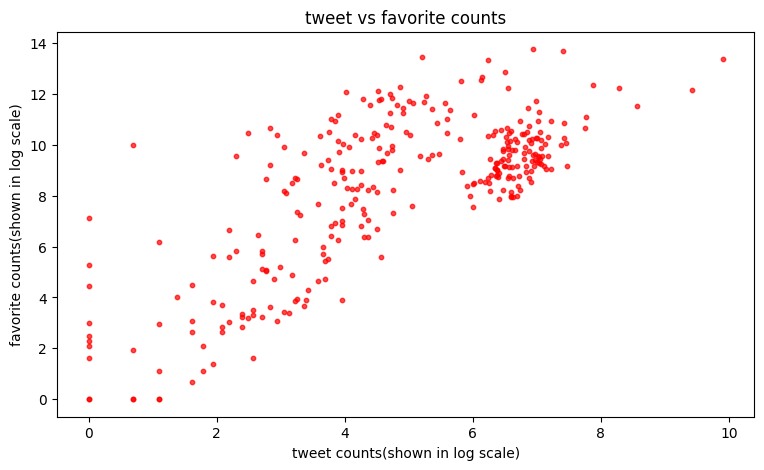

In [13]:

# Group the data by date and calculate the log of tweet counts and favorite counts
grouped_data = data.groupby(data['created_at'].dt.date)
log_tweets = np.log(grouped_data['full_text'].count())
log_favorites = np.log(grouped_data['favorite_count'].sum())

# Filter out zero counts
valid_data = (log_tweets != -np.inf) & (log_favorites != -np.inf)
log_tweets = log_tweets[valid_data]
log_favorites = log_favorites[valid_data]


# Set the figure size
plt.figure(figsize=(9, 5))

# Set the dot size
dot_size = 10

# Create the scatter plot with adjusted dot size
plt.scatter(log_tweets, log_favorites, s=dot_size, alpha=0.7, color='red')

# Set the x-axis and y-axis labels
plt.xlabel('tweet counts(shown in log scale)')
plt.ylabel('favorite counts(shown in log scale)')

# Set the plot title
plt.title('tweet vs favorite counts')

# Show the plot
plt.show()


## Task 6: 

Use the geoMap.csv file to produce a heatmap of Google HCQ searching score over states in the US.  

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 6](./images/task6.png)

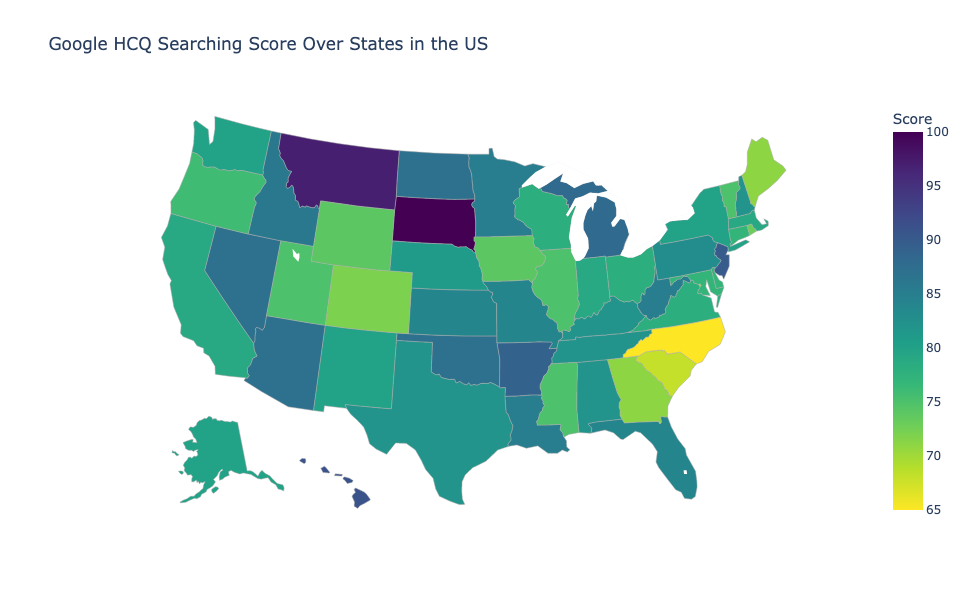

In [14]:
# Import the required module for creating visualizations
import plotly.graph_objects as go

# Load your score data
df = pd.read_csv('geoMap.csv')

# Create a choropleth figure

fig = go.Figure(data=go.Choropleth(
    locations=df['Abb'], 
    z=df['Score'],
    text=df['State'],
    locationmode='USA-states',
    colorscale='Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title="Score",
))

# Update the figure layout

fig.update_layout(
    title_text='Google HCQ Searching Score Over States in the US',
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    ),
    width=800,  # set figure width
    height=600  # set figure height
)

# Show the figure
fig.show()


## Task 7: 

Use the tweets_manual_classifying.csv file to produce wordcloud plots

(a) Most frequently used words, 

(b) [Bonus: 20 points for this plot] Positive vs. negative words using ”Bing” lexicon

Create the following plot. 

Your figure should look similar (though not necessarily identical)

![Task 7](./images/task7.png)

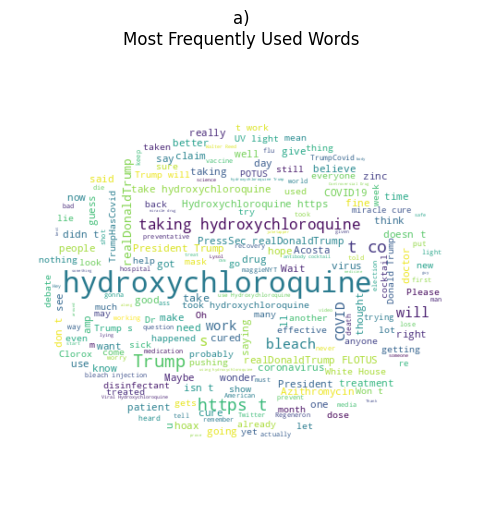

In [15]:
from wordcloud import WordCloud


# Load the data from the CSV file
data_manual = pd.read_csv('tweets_manual_classifying.csv')

# Concatenate all the text into a single string
text = ' '.join(data_manual['full_text'].astype(str))

# Create a custom mask as an oval shape
mask = np.zeros((500, 500), dtype=np.uint8)
center_x = mask.shape[1] // 2
center_y = mask.shape[0] // 2
radius_x = int(mask.shape[1] * 0.45)
radius_y = int(mask.shape[0] * 0.35)
y_indices, x_indices = np.ogrid[:mask.shape[0], :mask.shape[1]]
mask[((x_indices - center_x) / radius_x) ** 2 + ((y_indices - center_y) / radius_y) ** 2 <= 1] = 255
mask = 255 - mask  # Invert the mask

# Create a WordCloud object with the inverted oval mask
wordcloud = WordCloud(mask=mask, background_color='white').generate(text)

# Create the word cloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')

plt.title('a)\nMost Frequently Used Words')

# Show the plot
plt.show()


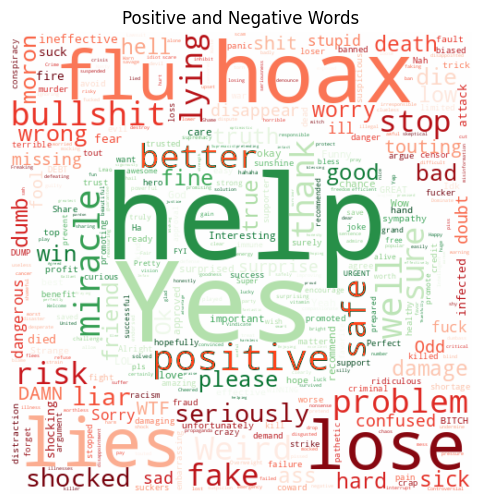

In [16]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# Concatenate all the reviews into a single string
reviews = ' '.join(data_manual['full_text'].astype(str))

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each word
word_sentiments = {
    word: sia.polarity_scores(word)['compound']
    for word in reviews.split()
    if word.lower() not in stopwords.words('english')
}

# Filter words based on sentiment
positive_words = [word for word, sentiment in word_sentiments.items() if sentiment > 0]
negative_words = [word for word, sentiment in word_sentiments.items() if sentiment < 0]

# Create a custom mask as an oval shape
mask = np.zeros((500, 500, 3), dtype=np.uint8)
center_x = mask.shape[1] // 2
center_y = mask.shape[0] // 2
radius_x = int(mask.shape[1] * 0.45)
radius_y = int(mask.shape[0] * 0.3)
y_indices, x_indices = np.ogrid[:mask.shape[0], :mask.shape[1]]
mask[((x_indices - center_x) / radius_x) ** 2 + ((y_indices - center_y) / radius_y) ** 2 <= 1] = [255, 255, 255]

# Invert the mask
inverted_mask = np.bitwise_not(mask)

# Create WordCloud objects for positive and negative words
positive_wordcloud = WordCloud(background_color='white', mask=inverted_mask, colormap='Greens').generate(' '.join(positive_words))
negative_wordcloud = WordCloud(background_color='white', mask=mask, colormap='Reds').generate(' '.join(negative_words))

# Create a combined oval-shaped word cloud
combined_wordcloud = positive_wordcloud.to_array() + negative_wordcloud.to_array()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Display the combined word cloud
ax.imshow(combined_wordcloud, interpolation='bilinear')
ax.axis('off')

# Set the title
plt.title('Positive and Negative Words')

# Show the plot
plt.show()


## Task 8, 9, and 10

Imagine that you are trying to gain insights from the HCQ dataset. You have done 7 plots. Take a moment to review what you get from those plots: patterns, trends, relationships, ...

Now you will explore things yourself. Create 03 plots for task 8, 9, and 10. For each plot, justify why you want to create it. You may not see any patterns but it is worth it as you know no patterns there.

You can use some hints I put here but you do not have to. I would love to see your exploration.

Hints:

#1 Think about the State column you created in the midterm project. We have not used it.

#2 We have not used a period of a month


## Number of tweets and Sentiment Analysis
I want to create this plot to see the relationship between number of HCQ tweet and public sentiment. It can also provide insights into how public sentiment might influence number of HCQ tweet patterns.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/LC/nguydu03/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


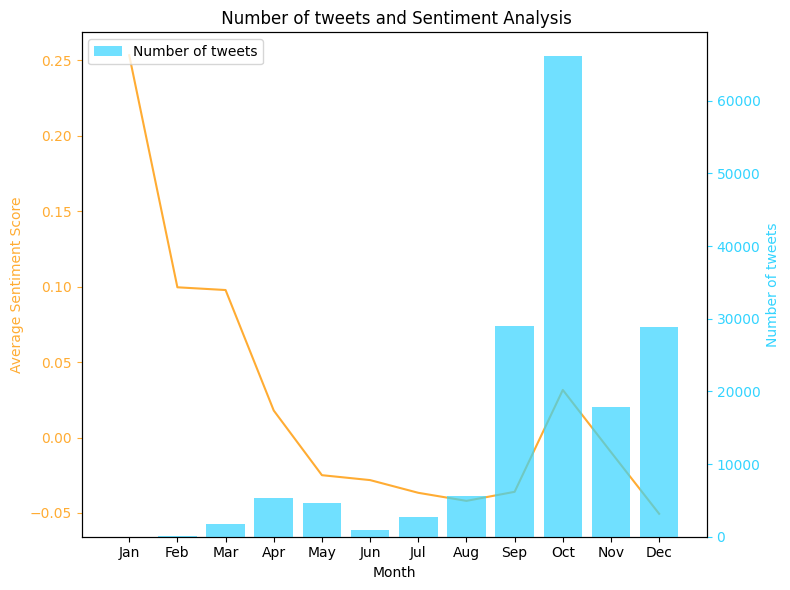

In [22]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the data from the HCQ dataset
data = pd.read_csv('clean_tweet_state.csv')

# Perform sentiment analysis and add sentiment scores to the data
nltk.download('vader_lexicon')  # Download the sentiment analysis lexicon 
sid = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['full_text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Group the data by month and calculate the average sentiment score and number of tweets mentioned HCQ
data['created_at'] = pd.to_datetime(data['created_at'])
data['month'] = data['created_at'].dt.month
monthly_data = data.groupby('month').agg({'sentiment_score': 'mean', 'full_text': 'count'}).reset_index()
monthly_data = monthly_data.rename(columns={'full_text': 'HCQ_Usage'})

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the sentiment score
ax1.plot(monthly_data['month'], monthly_data['sentiment_score'], color='#FFAC33')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sentiment Score', color='#FFAC33')
ax1.tick_params('y', colors='#FFAC33')

# Create a secondary axis for HCQ usage
ax2 = ax1.twinx()
ax2.bar(monthly_data['month'], monthly_data['HCQ_Usage'], color='#33D4FF', alpha=0.7)
ax2.set_ylabel('Number of tweets', color='#33D4FF')
ax2.tick_params('y', colors='#33D4FF')

# Set the x-axis tick labels
ax1.set_xticks(monthly_data['month'])
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set the plot title and legends
plt.title(' Number of tweets and Sentiment Analysis')
plt.legend(['Number of tweets'])

# Show the plot
plt.tight_layout()
plt.show()


## Number of twwets by Day of Week
I want to see the frequency of HCQ-related tweets based on the day of the week. By grouping the data by the day of the week, we can observe any patterns or trends in number of tweets on different days of week. And we can see that Friday has the greatest ammount of tweet on HCQ

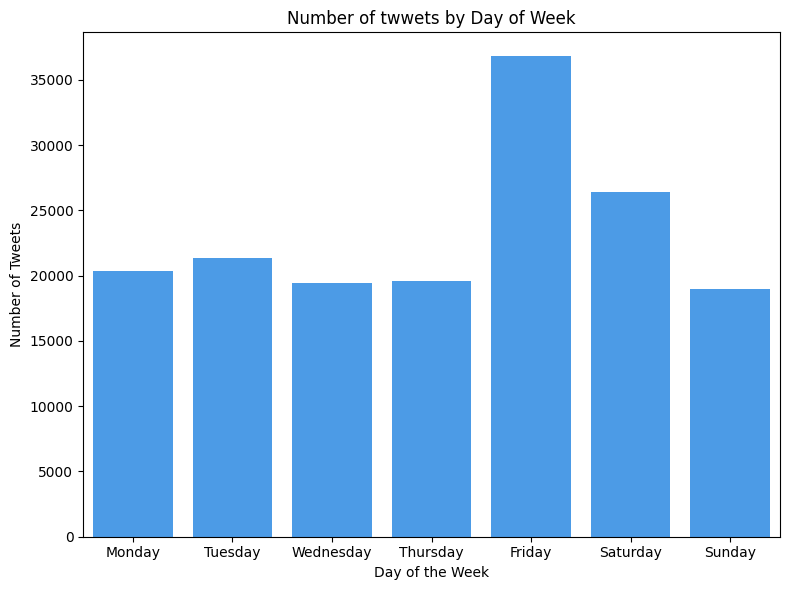

In [ ]:


# Load the data from the CSV file
data = pd.read_csv('clean_tweet_state.csv')

# Convert the 'created_at' column to datetime format
data['created_at'] = pd.to_datetime(data['created_at'])

# Extract the day of the week from the 'created_at' column
data['day_of_week'] = data['created_at'].dt.day_name()

# Group the data by day of the week and count the number of tweets
usage_by_day = data.groupby('day_of_week').size()

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=usage_by_day.index, y=usage_by_day.values, order=day_order, color='#339CFF')

# Set the labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.title('Number of twwets by Day of Week')

# Show the plot
plt.tight_layout()
plt.show()

## Number of tweets by State
In this plot, we can visualize the distribution of number of tweet across different states. By grouping the data by the state column, we can analyze the frequency of HCQ-related tweets in each state. This plot helps us understand which states have a higher or lower prevalence of HCQ discussions, providing insights into regional variations in the interest or concerns related to HCQ.



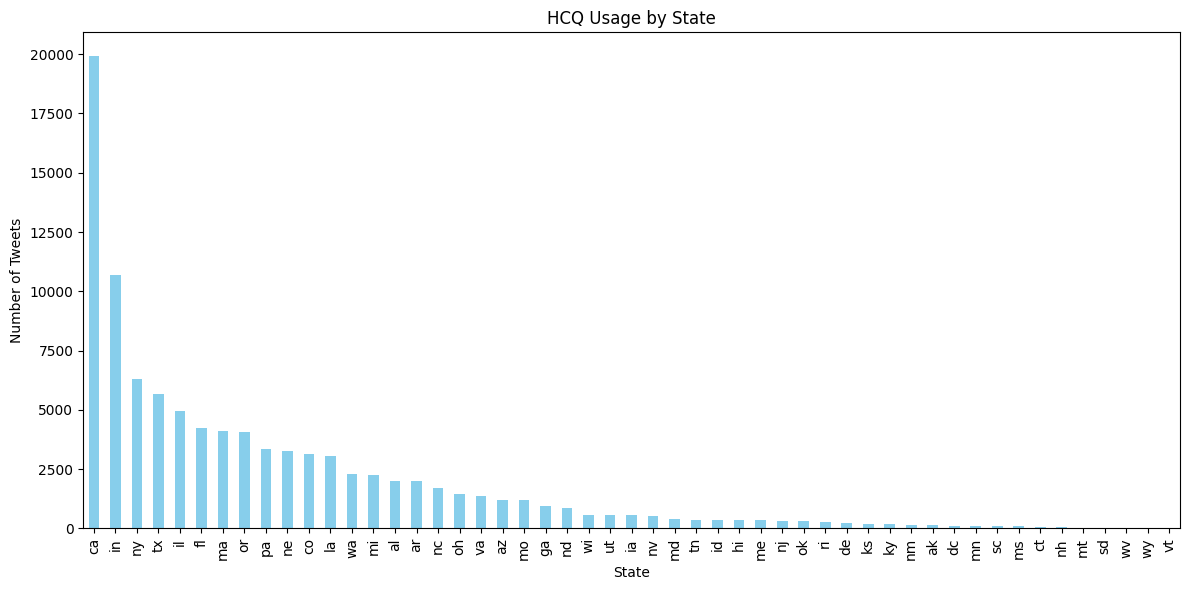

In [ ]:

# Count the occurrences of each state
state_counts = data['state'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='skyblue')

# Set the labels and title
plt.xlabel('State')
plt.ylabel('Number of Tweets')
plt.title('Number of tweets by state')

# Show the plot
plt.tight_layout()
plt.show()
